# Exercise 6.5 Unsupervised Machine Learning: Clustering

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl

# Loading and Checking the Data

In [5]:
# Define the path to the directory
path = '/Users/marika'

In [11]:
import pandas as pd
import os

# Define the path to the directory
path = '/Users/marika/'

# Read the CSV file using os.path.join()
df_clustered = pd.read_csv(os.path.join(path, 'crude suicide rate per 100K copy.csv'))

# Display the first few rows of the DataFrame to verify it loaded correctly
print(df_clustered.head())

              Location  Year         Sex  FactValueNumeric
0  Antigua and Barbuda  2019        Male              0.00
1             Barbados  2019      Female              0.32
2  Antigua and Barbuda  2019  Both sexes              0.39
3             Barbados  2019  Both sexes              0.62
4              Grenada  2019        Male              0.59


In [12]:
df_clustered.head(1-20)

,Location,Year,Sex,FactValueNumeric
0,Antigua and Barbuda,2019,Male,0.00
1,Barbados,2019,Female,0.32
2,Antigua and Barbuda,2019,Both sexes,0.39
3,Barbados,2019,Both sexes,0.62
4,Grenada,2019,Male,0.59
...,...,...,...,...
10956,Seychelles,2000,Both sexes,9.18
10957,Luxembourg,2000,Female,9.18
10958,North Macedonia,2000,Both sexes,9.32
10959,Panama,2000,Male,9.32


In [13]:
df_clustered.tail()

,Location,Year,Sex,FactValueNumeric
10975,Bahrain,2000,Male,9.77
10976,Cuba,2000,Female,9.84
10977,Morocco,2000,Both sexes,9.90
10978,Kiribati,2000,Female,9.94
10979,Russian Federation,2000,Male,96.67


In [15]:
# Checking the dataset is correctly loaded
print(df_clustered.head())
print(df_clustered.info())
df_clustered.shape

              Location  Year         Sex  FactValueNumeric
0  Antigua and Barbuda  2019        Male              0.00
1             Barbados  2019      Female              0.32
2  Antigua and Barbuda  2019  Both sexes              0.39
3             Barbados  2019  Both sexes              0.62
4              Grenada  2019        Male              0.59
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          10980 non-null  object 
 1   Year              10980 non-null  int64  
 2   Sex               10980 non-null  object 
 3   FactValueNumeric  10980 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 343.3+ KB
None


(10980, 4)

In [17]:
# Drop non-numeric columns
df_clustered_numeric = df_clustered.select_dtypes(include=[np.number])

In [18]:
# Verify non-numeric columns are dropped
print(df_clustered_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              10980 non-null  int64  
 1   FactValueNumeric  10980 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 171.7 KB
None


In [19]:
# Select relevant features for clustering
features = df_clustered_numeric[['Year', 'FactValueNumeric']]

In [20]:
# Verify selection
features.head()

,Year,FactValueNumeric
0,2019,0.00
1,2019,0.32
2,2019,0.39
3,2019,0.62
4,2019,0.59


In [21]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [22]:
# Verify standardization
pd.DataFrame(scaled_features, columns=features.columns).head()

,Year,FactValueNumeric
0,1.647509,-0.943412
1,1.647509,-0.915150
2,1.647509,-0.908968
3,1.647509,-0.888655
4,1.647509,-0.891304


# The Elbow Technique

In [23]:
# Using the elbow technique with the negative inertia (score) method
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]
score = [kmeans[i].fit(scaled_features).score(scaled_features) for i in range(len(kmeans))]

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-21960.0,
 -13646.592524798909,
 -7787.809268945134,
 -6224.913520585194,
 -4902.58029661219,
 -4035.9153907749387,
 -3474.157064033538,
 -3057.9962025817777,
 -2796.095845273546]

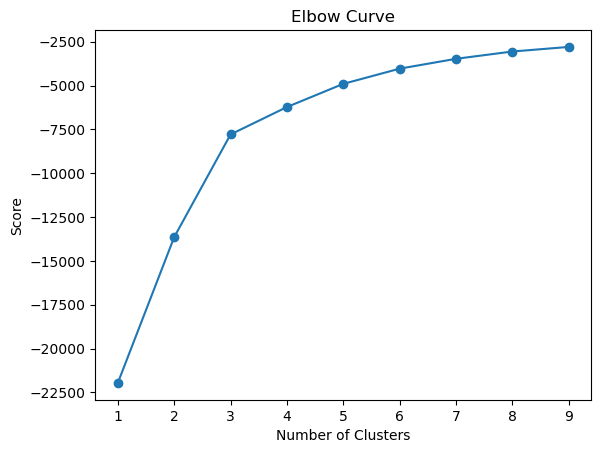

<Figure size 640x480 with 0 Axes>

In [24]:
# Plot the elbow method graph with pylab
pl.plot(num_cl,score, marker='o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Ensure the path
path = '/Users/marika'

# Save the plot to the "Visuals" folder
file_name = os.path.join(path, 'elbow_method_graph.png')
plt.savefig(file_name)

# Run the K-means Algorithm

In [25]:
# Apply the K-means algorithm to the standardized data with the chosen number of clusters, 4
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=18, n_init=10)

# Attach Cluster Labels to the Dataframe

In [26]:
# Add the cluster labels to the original dataframe and to the subset
df_clustered['Cluster'] = kmeans.fit_predict(scaled_features)
df_clustered_numeric['Cluster'] = kmeans.fit_predict(scaled_features)

In [27]:
# Verify cluster assignment
df_clustered_numeric.head()

,Year,FactValueNumeric,Cluster
0,2019,0.00,0
1,2019,0.32,0
2,2019,0.39,0
3,2019,0.62,0
4,2019,0.59,0


# Create Visualizations of the Clustered Data

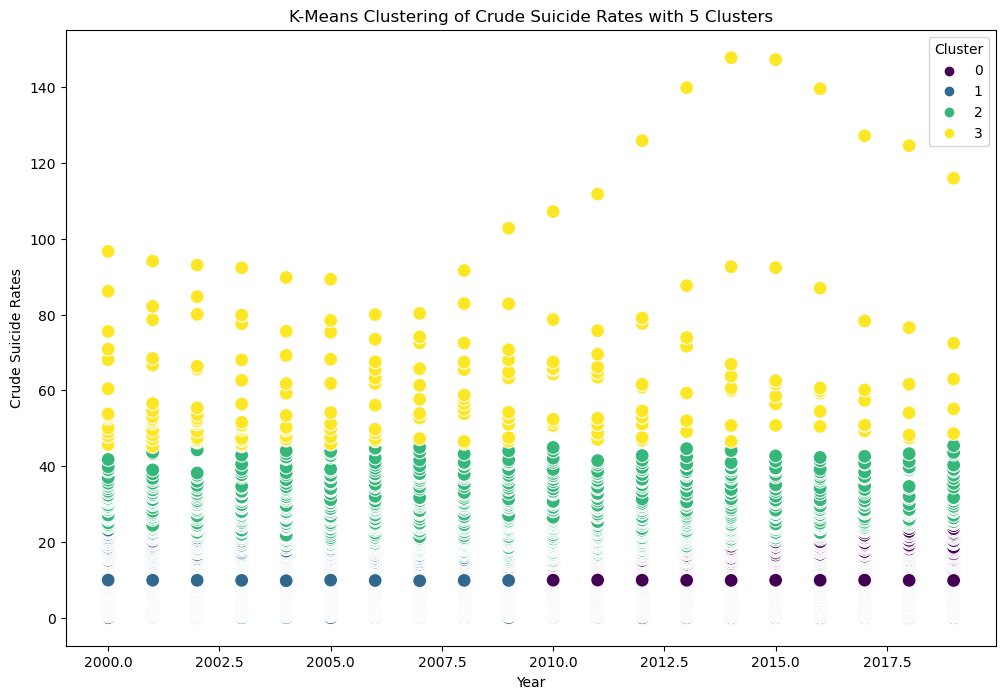

<Figure size 640x480 with 0 Axes>

In [32]:
# Plotting the clusters of Crude Suicide Rates with 4 clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clustered_numeric, x='Year', y='FactValueNumeric', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of Crude Suicide Rates with 5 Clusters')
plt.xlabel('Year')
plt.ylabel('Crude Suicide Rates')
plt.legend(title='Cluster')
plt.show()

# Export the scatterplot of clusters
path = '/Users/marika'

# Save the plot to the "Visuals" folder
file_name = os.path.join(path, 'elbow_method_graph.png')
plt.savefig(file_name)

# Calculate Descriptive Statistics for Clusters

In [33]:
# Descriptive stats for clusters
cluster_stats = df_clustered_numeric.groupby('Cluster').agg(['count', 'mean', 'std', 'min', 'max'])
print(cluster_stats)

         Year                                    FactValueNumeric             \
        count         mean       std   min   max            count       mean   
Cluster                                                                        
0        4815  2014.639045  2.861963  2010  2019             4815   7.112033   
1        4670  2004.397859  2.866965  2000  2009             4670   7.429844   
2        1283  2009.060016  4.934230  2000  2019             1283  27.155300   
3         212  2007.834906  5.549101  2000  2019              212  63.708443   

                                   
               std    min     max  
Cluster                            
0         4.658526   0.00   24.29  
1         4.708807   0.00   23.14  
2         7.059005  15.23   45.41  
3        19.565558  45.19  147.80  
